**1. Seleccione un dataset de su interés (de cualquier repositorio, que contenga datos tabulares mínimo de 1500 filas y al menos 10 columnas). Realice el cálculo de la media, moda, cuartiles de datos y de percentiles por columna; explique qué significa en cada caso graficando los resultados (sin numpy y pandas).**

# Dataset "Bank Marketing Dataset"
**age:**        Edad del cliente  \
**job:**        Ocupación del cliente \
**marital:**	Estado civil del cliente \
**education:**	Nivel de educación del cliente \
**default:**    ¿El cliente tiene un historial de impago? \
**balance:**	Saldo actual de la cuenta del cliente \
**housing:**	¿El cliente tiene una hipoteca? \
**loan:**   	¿El cliente tiene un préstamo? \
**contact:**	¿El contacto se realizó por teléfono, correo o ambos? \
**day:**    	Día de la semana en que se realizó la llamada \
**month:**  	Mes en que se realizó la llamada \
**duration:**	Duración de la llamada en segundos \
**campaign:**	Número de veces que el cliente recibió una llamada de marketing \
**pdays:**	    Número de días transcurridos desde la última vez que el cliente recibió una llamada de marketing \
**previous:**	Número de veces que el cliente ha suscrito un producto de depósito a plazo en el pasado \
**poutcome:**  	Resultado de la última llamada de marketing \
**deposit:**    ¿El cliente suscribió un producto de depósito a plazo?

In [155]:
import pandas as pd
dat = pd.read_csv("./bank.csv")
dat.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


Código para hallar la Media, Moda, Cuartil y Percentil sin el uso de librerias

In [156]:
import math

nombre_colum = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

def media(mat):
    med, n = [], len(mat)
    for i in range(len(mat[0])):
        valores_columna = [fila[i] for fila in mat if not math.isnan(fila[i])]
        if valores_columna:
            med.append(sum(valores_columna) / len(valores_columna))
        else:
            med.append(float('nan'))
    return med

def moda(mat, criterio='primero'):
    mod, n = [], len(mat)
    for i in range(len(mat[0])):
        occ = {}
        for j in range(n):
            value = mat[j][i]
            occ[value] = occ.get(value, 0) + 1
        most_frequent = max(occ.values())
        if criterio == 'primero':
            modes = [key for key, value in occ.items() if value == most_frequent][0]
        elif criterio == 'menor':
            modes = min([key for key, value in occ.items() if value == most_frequent])
        else:
            modes = [key for key, value in occ.items() if value == most_frequent][0]
        frequency = most_frequent
        mod.append((modes, frequency))
    return mod


def cuartiles_matriz(mat):
    num_columnas = len(mat[0])
    cuartiles_por_columna = []

    for columna in range(num_columnas):
        valores_columna = sorted([fila[columna] for fila in mat if not math.isnan(fila[columna])])
        if valores_columna:
            q1, mediana, q3 = cuartiles(valores_columna)
            cuartiles_por_columna.append((q1, mediana, q3))
        else:
            cuartiles_por_columna.append((float('nan'), float('nan'), float('nan')))
    
    return cuartiles_por_columna

def cuartiles(columna):
    n = len(columna)
    q1_index = math.floor(n * 0.25)
    q2_index = math.floor(n * 0.5)
    q3_index = math.floor(n * 0.75)

    q1 = columna[q1_index] if n % 2 != 0 else (columna[q1_index - 1] + columna[q1_index]) / 2
    q2 = columna[q2_index] if n % 2 != 0 else (columna[q2_index - 1] + columna[q2_index]) / 2
    q3 = columna[q3_index] if n % 2 != 0 else (columna[q3_index - 1] + columna[q3_index]) / 2

    return q1, q2, q3

def percentiles_matriz(matriz, percentiles):
    num_columnas = len(matriz[0])
    percentiles_por_columna = []

    for columna in range(num_columnas):
        valores_columna = sorted([fila[columna] for fila in matriz if not math.isnan(fila[columna])])
        if valores_columna:
            valores_percentiles = calcular_percentiles(valores_columna, percentiles)
            percentiles_por_columna.append(valores_percentiles)
        else:
            percentiles_por_columna.append([float('nan') for _ in percentiles])
    
    return percentiles_por_columna

def calcular_percentiles(datos, percentiles):
    n = len(datos)
    valores_percentiles = []

    for percentile in percentiles:
        if percentile < 0 or percentile > 100:
            raise ValueError("Los percentiles deben estar en el rango de 0 a 100.")

        rank = (percentile / 100) * (n - 1)
        if rank.is_integer():
            percentile_value = datos[int(rank)]
        else:
            lower_rank = math.floor(rank)
            upper_rank = math.ceil(rank)
            lower_value = datos[lower_rank]
            upper_value = datos[upper_rank]
            percentile_value = lower_value + (rank - lower_rank) * (upper_value - lower_value)

        valores_percentiles.append(percentile_value)

    return valores_percentiles


In [157]:
columnas_seleccionadas = dat.iloc[:, [0, 5, 9, 11, 12, 13, 14]]
datos = columnas_seleccionadas.to_numpy()

# Cálculo de la Media
La media es el valor promedio de un conjunto de datos y se calcula sumando todos los valores y dividiendo la suma por el número de valores.

In [158]:
med = media(datos)
max_longitud = max(len(nombre) for nombre in nombre_colum)
for i in range(7):
    formato = "{{:<{}}} : {{:<10.6f}}".format(max_longitud)
    print(formato.format(nombre_colum[i], med[i]))

age      : 41.231948 
balance  : 1528.538524
day      : 15.658036 
duration : 371.993818
campaign : 2.508421  
pdays    : 51.330407 
previous : 0.832557  


# Cálculo de la Moda
La moda es el valor que ocurre con mayor frecuencia en un conjunto de datos.

In [159]:
mod = moda(datos)
print("\t\t      FRECUENCIA")
for i, (moda_valor, frecuencia) in enumerate(mod):
    formato = "{{:<{}}} : {{:<10.2f}}".format(max_longitud)
    if math.isnan(moda_valor):
        moda_valor = float(0)
    print(formato.format(nombre_colum[i], moda_valor), frecuencia)

		      FRECUENCIA
age      : 31.00      496
balance  : 0.00       774
day      : 20.00      570
duration : 97.00      39
campaign : 1.00       4798
pdays    : -1.00      8324
previous : 0.00       8324


# Cálculo de los Cuartiles
Los cuartiles dividen un conjunto de datos ordenados en cuatro partes iguales. El primer cuartil (Q1) es el valor que separa el 25% inferior de los datos, el segundo cuartil (Q2) es la mediana y el tercer cuartil (Q3) separa el 75% inferior.

In [160]:
cuartil = cuartiles_matriz(datos)
for i in range(7):
    print(nombre_colum[i])
    print("   Q1: " + str(cuartil[i][0]))
    print("   Q2: " + str(cuartil[i][1]))
    print("   Q3: " + str(cuartil[i][2]) + "\n")

age
   Q1: 32.0
   Q2: 39.0
   Q3: 49.0

balance
   Q1: 122.0
   Q2: 550.0
   Q3: 1708.0

day
   Q1: 8.0
   Q2: 15.0
   Q3: 22.0

duration
   Q1: 138.0
   Q2: 255.0
   Q3: 496.0

campaign
   Q1: 1.0
   Q2: 2.0
   Q3: 3.0

pdays
   Q1: -1.0
   Q2: -1.0
   Q3: 20.5

previous
   Q1: 0.0
   Q2: 0.0
   Q3: 1.0



# Cálculo de Percentiles
Los percentiles son medidas que dividen un conjunto de datos en 100 partes iguales, representando un porcentaje específico de los datos. Por ejemplo, el percentil 25 (P25) es el valor por debajo del cual se encuentra el 25% de los datos, y el percentil 50 (P50) es la mediana. Los percentiles ayudan a comprender cómo se distribuyen los valores en relación con porcentajes específicos.

In [161]:
div = [10, 90]
percentil = percentiles_matriz(datos, div)
for i in range(7):
    print(nombre_colum[i])
    for j in range(len(div)):
        print(f"   P{div[j]}: " + str(percentil[i][j]))    
    print()

age
   P10: 28.0
   P90: 58.0

balance
   P10: 0.0
   P90: 3897.599999999995

day
   P10: 4.0
   P90: 28.0

duration
   P10: 77.0
   P90: 838.0

campaign
   P10: 1.0
   P90: 5.0

pdays
   P10: -1.0
   P90: 191.0

previous
   P10: 0.0
   P90: 3.0



# Explicación

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

def graficar(dataframe, posicion_columna):
    # Verificar si la posición de la columna es válida
    if posicion_columna < 0 or posicion_columna >= len(dataframe.columns):
        print("Posición de columna no válida.")
        return

    # Obtener el nombre de la columna en la posición especificada
    nombre_columna = dataframe.columns[posicion_columna]

    # Verificar el tipo de datos de la columna
    if dataframe[nombre_columna].dtype == 'int64' or dataframe[nombre_columna].dtype == 'float64':
        # Si la columna contiene datos numéricos (enteros o flotantes), generar un histograma
        plt.hist(dataframe[nombre_columna], bins=20)  # Puedes ajustar el número de bins según tus necesidades
        plt.title(f"Histograma de {nombre_columna}")
        plt.xlabel(nombre_columna)
        plt.ylabel("Frecuencia")
        plt.show()
    else:
        # Si la columna contiene datos no numéricos, generar un gráfico de barras
        valores = dataframe[nombre_columna].value_counts()
        plt.bar(valores.index, valores.values)
        plt.title(f"Gráfico de barras de {nombre_columna}")
        plt.xlabel(nombre_columna)
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejorar la legibilidad
        plt.show()

# Age: (Edad del cliente)

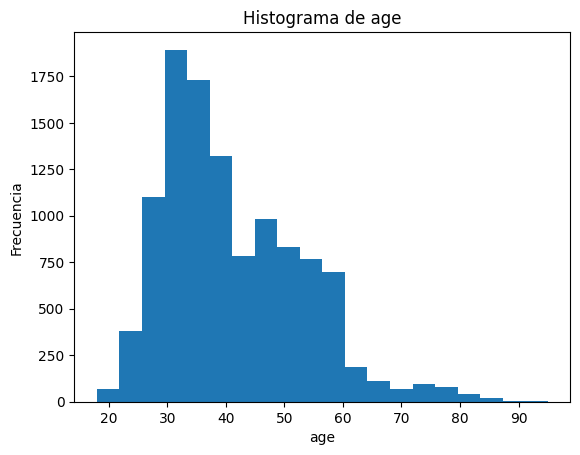

media:  41.231947679627304
moda:  31 	frecuencia:  496
---Cuartiles---
 Q1:  32.0
 Q2:  39.0
 Q3:  49.0
---Percentiles---
 P10:  28.0
 P90:  58.0


In [163]:
a = 0
graficar(dat, 0)
print("media: ", med[a])
print("moda: ", mod[a][0], "\tfrecuencia: ", mod[a][1])
print("---Cuartiles---")
print(" Q1: ", cuartil[a][0])
print(" Q2: ", cuartil[a][1])
print(" Q3: ", cuartil[a][2])
print("---Percentiles---")
print(" P10: ", percentil[a][0])
print(" P90: ", percentil[a][1])

**Interpretación:** \
La columna "Edad (age)" en el dataset muestra que la mayoría de los clientes tienen edades en un rango que oscila entre 28 y 58 años, con una concentración significativa alrededor de los 31 años, como lo sugiere la moda. La media de edad de 41 años indica una distribución de edades centrada, mientras que los cuartiles y percentiles revelan una dispersión razonable en las edades. Esta información es fundamental para entender el perfil demográfico de los clientes y puede ayudar en la definición de estrategias de marketing y productos bancarios, así como en la personalización de ofertas específicas para segmentos de clientes basadas en sus edades.

# job: Ocupación del cliente

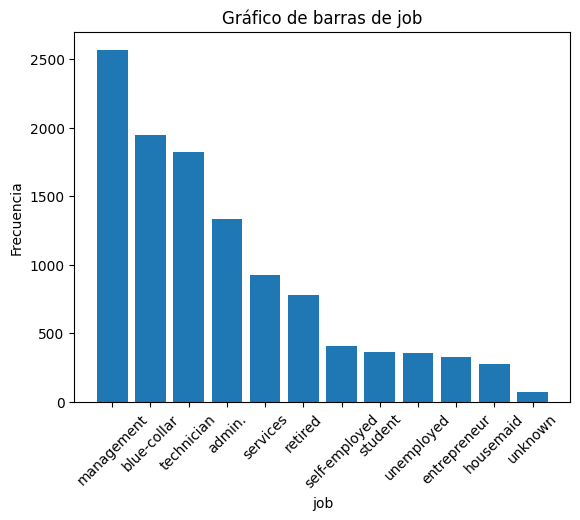

In [164]:
graficar(dat, 1)

**Intepretación:**

La columna "Ocupación (job)" es una variable categórica que proporciona información sobre las ocupaciones de los clientes en el dataset. La distribución de las ocupaciones revela la diversidad de perfiles ocupacionales entre los clientes. Las ocupaciones más comunes son "Management," "Blue-collar," y "Technician," lo que sugiere que una parte significativa de los clientes trabaja en roles de gestión, trabajadores manuales o técnicos.

Por otro lado, la categoría "Unknown" indica que hay algunos datos de ocupación que faltan o no se han registrado en el dataset. Esto puede requerir una revisión más detallada y limpieza de los datos para asegurarse de que se capturen todas las ocupaciones de los clientes de manera completa.

La información sobre las ocupaciones de los clientes es relevante para adaptar estrategias de marketing y productos a grupos específicos de ocupación, ya que diferentes ocupaciones pueden tener necesidades y preferencias distintas. En general, esta variable categórica proporciona información valiosa para la segmentación de clientes y la personalización de las ofertas.

# marital:	Estado civil del cliente

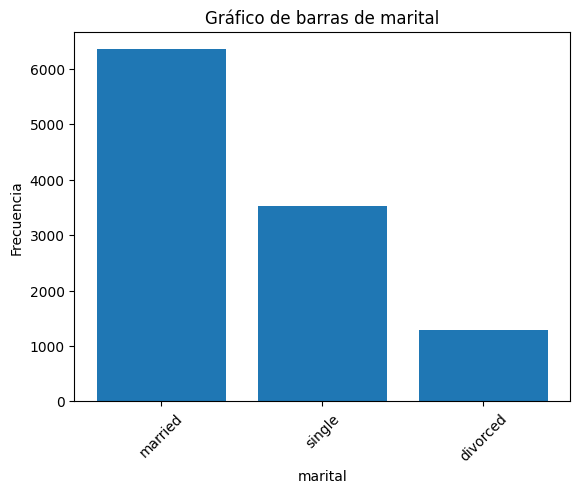

In [165]:
graficar(dat, 2)

**Interpretacion:**

La grafica muestra la distribución del estado civil de los clientes en la muestra de datos. La categoría más común es "Casados," seguida de "Solteros" y "Divorciados." Esta distribución es útil para comprender la composición demográfica de la muestra y puede ser relevante para diseñar estrategias de marketing y productos específicas según el estado civil de los clientes. Por ejemplo, se podrían adaptar las ofertas y campañas para abordar las necesidades y preferencias específicas de cada grupo de estado civil.

# education:	Nivel de educación del cliente

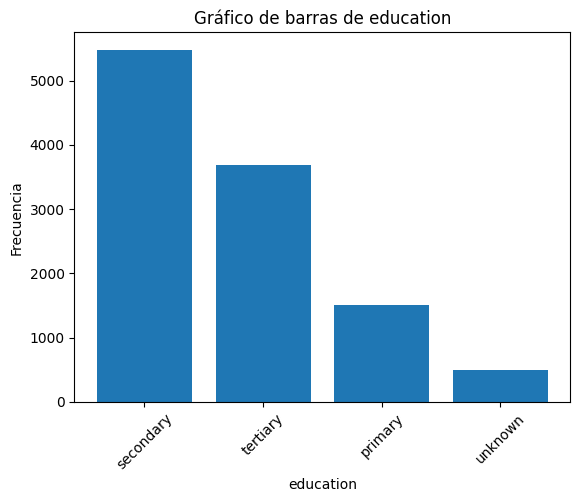

In [166]:
graficar(dat, 3)

**Interpretacion:**

La grafica muestra la distribución de los niveles educativos de los clientes en la muestra de datos. La categoría más común es "Secundaria," seguida de "Terciaria" y "Primaria." La categoría "Desconocido" indica que hay algunos datos de educación faltantes o no registrados en el dataset.

El nivel educativo de los clientes es relevante para adaptar estrategias de marketing y productos, ya que las personas con diferentes niveles educativos pueden tener necesidades y preferencias distintas.

# default:    ¿El cliente tiene un historial de impago?

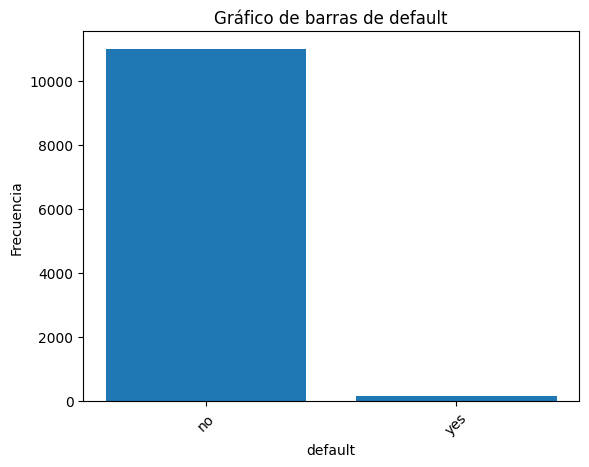

In [167]:
graficar(dat, 4)

**Interpretacion:**

La grafica muestra la distribución de la variable que indica si los clientes tienen créditos en incumplimiento. La mayoría de los clientes, no tienen créditos en incumplimiento, mientras que existen clientes que tienen créditos en incumplimiento.

El conocimiento de si un cliente tiene un crédito en incumplimiento es fundamental para comprender su situación financiera y su capacidad de endeudamiento. Esta información puede ser relevante para la toma de decisiones crediticias y para diseñar estrategias específicas de gestión de riesgos o servicios financieros para aquellos que tienen créditos en incumplimiento.

# balance:	Saldo actual de la cuenta del cliente

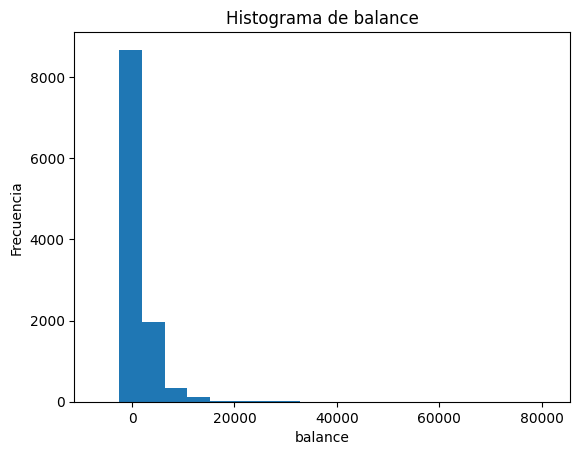

media:  1528.5385235620856
moda:  0 	frecuencia:  774
---Cuartiles---
 Q1:  122.0
 Q2:  550.0
 Q3:  1708.0
---Percentiles---
 P10:  0.0
 P90:  3897.599999999995


In [168]:
a = 1
graficar(dat, 5)
print("media: ", med[a])
print("moda: ", mod[a][0], "\tfrecuencia: ", mod[a][1])
print("---Cuartiles---")
print(" Q1: ", cuartil[a][0])
print(" Q2: ", cuartil[a][1])
print(" Q3: ", cuartil[a][2])
print("---Percentiles---")
print(" P10: ", percentil[a][0])
print(" P90: ", percentil[a][1])

**Interpretación:** \
La columna "balance" refleja una distribución de saldos de cuentas bancarias en la que la media es de aproximadamente 1,528.54 unidades monetarias. La moda en 0 unidades monetarias indica que un número significativo de clientes tienen saldos bajos o nulos. Los cuartiles muestran que la mayoría de los clientes tienen saldos en un rango que va desde 122 unidades monetarias (Q1) hasta 1,708 unidades monetarias (Q3), con un valor mediano de 550 unidades monetarias (Q2). Los percentiles indican que el 10% de los clientes tienen saldos de 0 unidades monetarias o menos, mientras que el 90% de los clientes tienen saldos inferiores a 3,897.60 unidades monetarias. \
En conclusion, la mayoría de los clientes tienen saldos bajos o moderados en sus cuentas bancarias, con una cantidad significativa de clientes que tienen saldos cercanos a cero.

# housing:	¿El cliente tiene una hipoteca?

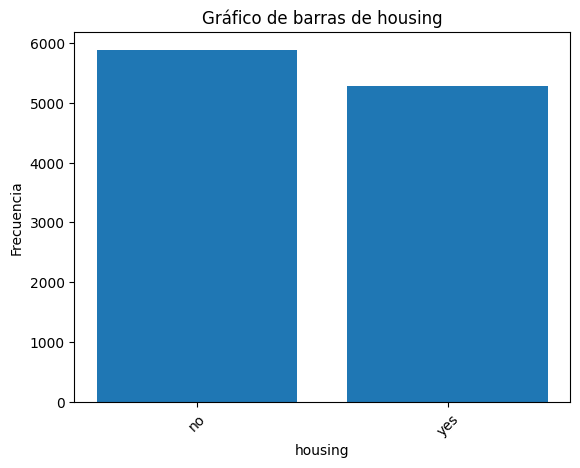

,Valor,Frecuencia
0,no,5881
1,yes,5281


In [169]:
graficar(dat, 6)
contar(dat, "housing")

**Interpretacion:**

La grafica muestra la distribución de la variable que indica si los clientes tienen un préstamo hipotecario. Casi la mitad de los clientes, no tienen un préstamo hipotecario, mientras hay clientes que sí tienen uno.

El conocimiento sobre la situación de préstamos hipotecarios de los clientes es crucial para comprender su situación financiera y su capacidad de inversión y ahorro. Esta información puede ser relevante para ofrecer servicios financieros o asesoramiento relacionado con vivienda y préstamos hipotecarios.

# loan:  	¿El cliente tiene un préstamo?

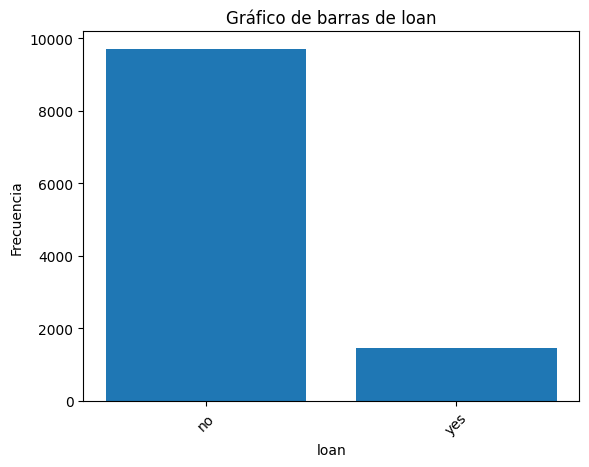

,Valor,Frecuencia
0,no,9702
1,yes,1460


In [170]:
graficar(dat, 7)
contar(dat, "loan")

**Interpretacion:**

La grafica muestra la distribución de la variable que indica si los clientes tienen un préstamo personal. La mayoría de los clientes, no tienen un préstamo personal, mientras que un porcentaje poco clientes sí tienen uno.

El conocimiento sobre la presencia de préstamos personales entre los clientes es importante para comprender sus compromisos financieros y su capacidad de endeudamiento. Esta información puede ser relevante para ofrecer servicios financieros relacionados con préstamos personales o asesoramiento sobre la gestión de deudas.

# contact:	¿El contacto se realizó por teléfono, correo o ambos?

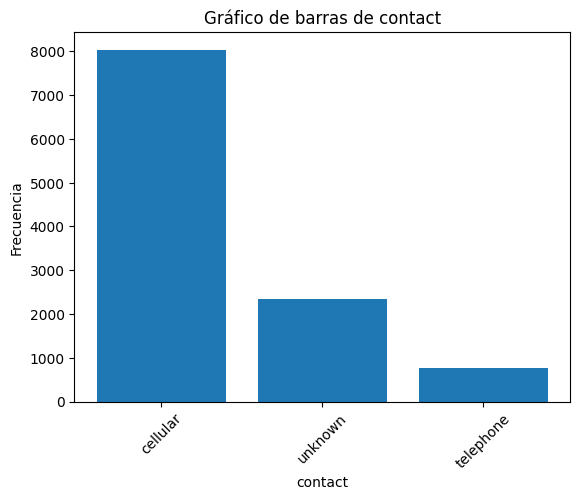

In [171]:
graficar(dat, 8)

**Interpretacion:**

La grafica muestra la distribución de los métodos de contacto utilizados para comunicarse con los clientes. La categoría "Celular" es la más común, lo que indica que la mayoría de los contactos se realizan a través de teléfonos celulares. La categoría "Desconocido" sugiere que algunos datos de contacto están faltantes o no se han registrado, y la categoría "Teléfono" representa un contacto a través de líneas de teléfono fijo.

El conocimiento sobre los métodos de contacto es importante para adaptar estrategias de comunicación y asegurarse de que los clientes sean contactados de manera efectiva a través de los canales preferidos.

# day:   	Día de la semana en que se realizó la llamada

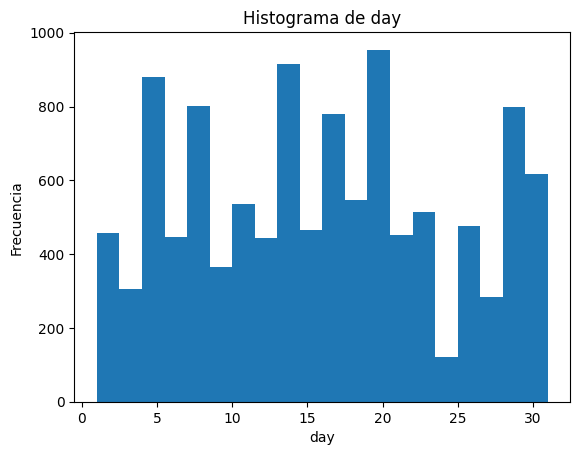

media:  15.658036194230425
moda:  20 	frecuencia:  570
---Cuartiles---
 Q1:  8.0
 Q2:  15.0
 Q3:  22.0
---Percentiles---
 P10:  4.0
 P90:  28.0


In [172]:
a = 2
graficar(dat, 9)
print("media: ", med[a])
print("moda: ", mod[a][0], "\tfrecuencia: ", mod[a][1])
print("---Cuartiles---")
print(" Q1: ", cuartil[a][0])
print(" Q2: ", cuartil[a][1])
print(" Q3: ", cuartil[a][2])
print("---Percentiles---")
print(" P10: ", percentil[a][0])
print(" P90: ", percentil[a][1])

**Interpretacion:** \
La columna "Día (day)" muestra la distribución de los días del mes en que se realizaron los últimos contactos. La media es de aproximadamente 15.66, lo que indica que, en promedio, los contactos se distribuyeron a lo largo del mes. La moda en 20 días con una frecuencia de 570 sugiere que el día 20 fue particularmente popular para realizar contactos. Los cuartiles muestran que la mayoría de los contactos se realizaron entre el octavo y el vigésimo segundo día del mes, y el percentil 10 (P10) indica que el 10% de los contactos ocurrieron en los primeros 4 días, mientras que el percentil 90 (P90) muestra que el 90% de los contactos ocurrieron antes del día 28. \

Por lo que, los contactos se distribuyen a lo largo del mes, pero el día 20 destaca como un día especialmente popular para las interacciones.

# month: 	Mes en que se realizó la llamada

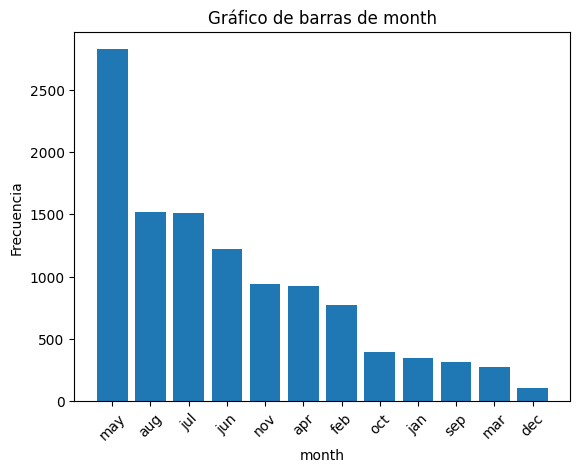

In [173]:
graficar(dat, 10)

**Interpretacion:**

La grafica muestra la distribución de los meses en los que se realizó el último contacto con los clientes. Mayo es el mes más común en el que se realizaron contactos, seguido de agosto y julio. Diciembre es el mes menos común.

El conocimiento de los meses de contacto es relevante para entender cuándo se llevaron a cabo las interacciones y puede ser útil para analizar patrones estacionales en las campañas de marketing o para programar contactos futuros en función de la respuesta de los clientes en determinados meses.

# duration:	Duración de la llamada en segundos

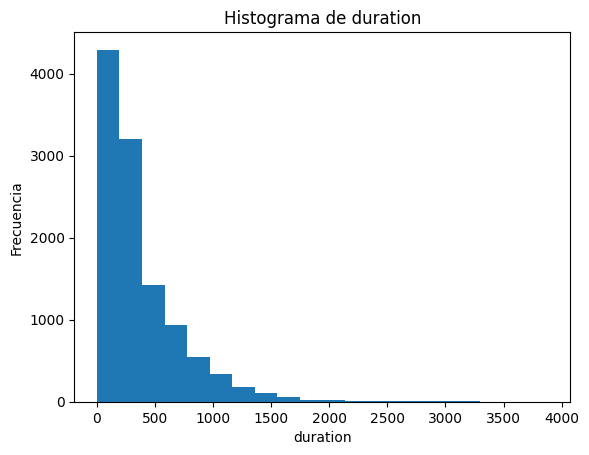

media:  371.99381831213043
moda:  97 	frecuencia:  39
---Cuartiles---
 Q1:  138.0
 Q2:  255.0
 Q3:  496.0
---Percentiles---
 P10:  77.0
 P90:  838.0


In [174]:
a = 3
graficar(dat, 11)
print("media: ", med[a])
print("moda: ", mod[a][0], "\tfrecuencia: ", mod[a][1])
print("---Cuartiles---")
print(" Q1: ", cuartil[a][0])
print(" Q2: ", cuartil[a][1])
print(" Q3: ", cuartil[a][2])
print("---Percentiles---")
print(" P10: ", percentil[a][0])
print(" P90: ", percentil[a][1])

**Interpretacion:** \
La columna "Duración (duration)" representa la duración en segundos de la última llamada de marketing. La media de aproximadamente 372 segundos indica que, en promedio, las llamadas duran alrededor de 6 minutos y 12 segundos. La moda en 97 segundos con una frecuencia de 39 sugiere que la duración de 97 segundos es un valor común para estas llamadas. 

Los cuartiles revelan una distribución significativa de duraciones de llamadas, con el primer cuartil (Q1) indicando que el 25% de las llamadas son más cortas de 138 segundos, el segundo cuartil (Q2) marcando el valor mediano en 255 segundos, y el tercer cuartil (Q3) mostrando que el 75% de las llamadas son más cortas de 496 segundos. 

Los percentiles señalan que el 10% de las llamadas tienen una duración de 77 segundos o menos, mientras que el 90% de las llamadas son de 838 segundos o menos. 

En conclusión, la duración de las llamadas varía significativamente, desde llamadas muy cortas hasta llamadas mucho más largas, lo que puede tener implicaciones en la efectividad de la campaña y en la calidad de la interacción con los clientes.

# campaign:	Número de veces que el cliente recibió una llamada de marketing

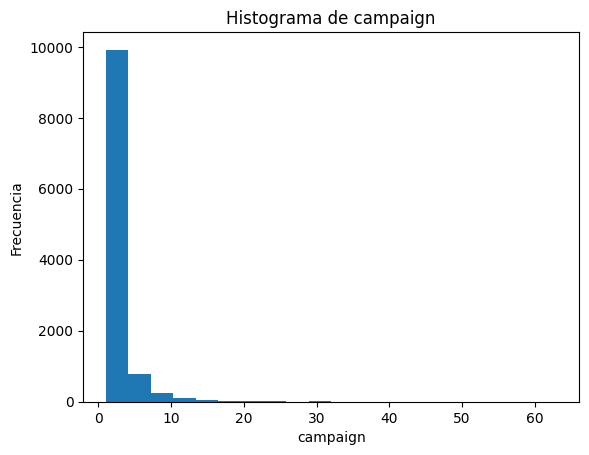

media:  2.508421429851281
moda:  1 	frecuencia:  4798
---Cuartiles---
 Q1:  1.0
 Q2:  2.0
 Q3:  3.0
---Percentiles---
 P10:  1.0
 P90:  5.0


In [175]:
a = 4
graficar(dat, 12)
print("media: ", med[a])
print("moda: ", mod[a][0], "\tfrecuencia: ", mod[a][1])
print("---Cuartiles---")
print(" Q1: ", cuartil[a][0])
print(" Q2: ", cuartil[a][1])
print(" Q3: ", cuartil[a][2])
print("---Percentiles---")
print(" P10: ", percentil[a][0])
print(" P90: ", percentil[a][1])

**Interpretacion:**

La columna "Campaña (campaign)" representa el número de contactos realizados durante esta campaña de marketing. La media de aproximadamente 2.51 indica que, en promedio, se realizaron alrededor de 2 o 3 contactos por cliente durante la campaña. La moda en 1 con una frecuencia de 4,798 sugiere que la mayoría de los clientes fueron contactados solo una vez durante la campaña.

Los cuartiles muestran una distribución de la cantidad de contactos, con el primer cuartil (Q1) indicando que el 25% de los clientes fueron contactados una vez o menos, el segundo cuartil (Q2) marcando un valor mediano de 2, y el tercer cuartil (Q3) mostrando que el 75% de los clientes recibieron tres o menos contactos.

Los percentiles indican que el 10% de los clientes recibieron solo un contacto durante la campaña (P10), mientras que el 90% de los clientes recibieron cinco o menos contactos (P90). 

Por lo que, la mayoría de los clientes fueron contactados una o unas pocas veces durante la campaña, lo que puede ser útil para evaluar la efectividad de la estrategia de contacto y evitar la sobrecarga de comunicación.


# pdays:	    Número de días transcurridos desde la última vez que el cliente recibió una llamada de marketing

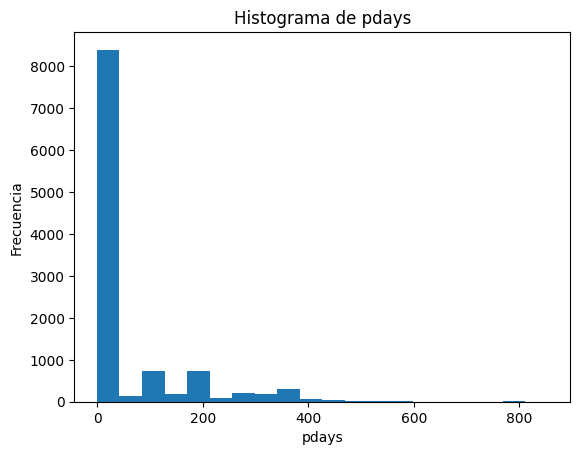

media:  51.33040673714388
moda:  -1 	frecuencia:  8324
---Cuartiles---
 Q1:  -1.0
 Q2:  -1.0
 Q3:  20.5
---Percentiles---
 P10:  -1.0
 P90:  191.0


In [176]:
a = 5
graficar(dat, 13)
print("media: ", med[a])
print("moda: ", mod[a][0], "\tfrecuencia: ", mod[a][1])
print("---Cuartiles---")
print(" Q1: ", cuartil[a][0])
print(" Q2: ", cuartil[a][1])
print(" Q3: ", cuartil[a][2])
print("---Percentiles---")
print(" P10: ", percentil[a][0])
print(" P90: ", percentil[a][1])

**Interpretacion:** 

La columna "Días después del último contacto (pdays)" representa el número de días que han transcurrido desde el último contacto en la campaña anterior. La media de aproximadamente 51.33 indica que, en promedio, los clientes fueron contactados después de aproximadamente 51 días desde el último contacto anterior. La moda en -1 con una frecuencia de 8,324 sugiere que una gran cantidad de clientes fueron contactados por primera vez y no tenían un contacto previo registrado.

Los cuartiles muestran una variación en el tiempo transcurrido desde el último contacto. El primer cuartil (Q1) indica que el 25% de los clientes fueron contactados inmediatamente después del último contacto (valor de -1), el segundo cuartil (Q2) tiene el mismo valor, y el tercer cuartil (Q3) muestra que el 75% de los clientes fueron contactados en un período de 20.5 días desde el último contacto.

Los percentiles indican que el 10% de los clientes fueron contactados inmediatamente después del último contacto (P10), mientras que el 90% de los clientes fueron contactados dentro de los 191 días posteriores (P90). 

Entonces, existe una variabilidad en el tiempo transcurrido desde el último contacto, con una proporción significativa de clientes que fueron contactados por primera vez durante la campaña actual por lo que puede influir en la estrategia de seguimiento y la efectividad de las interacciones con los clientes.

# previous:	Número de veces que el cliente ha suscrito un producto de depósito a plazo en el pasado

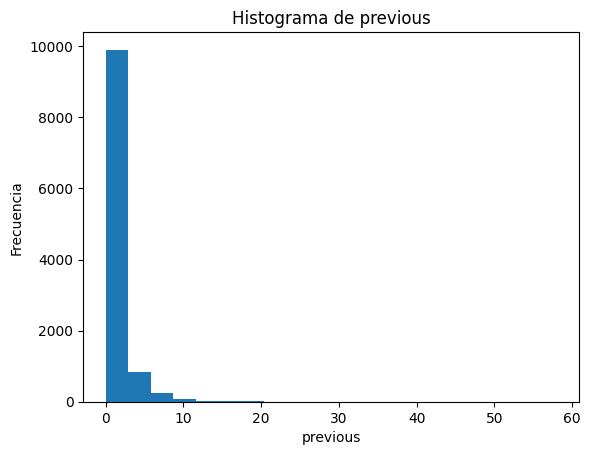

media:  0.8325568894463358
moda:  0 	frecuencia:  8324
---Cuartiles---
 Q1:  0.0
 Q2:  0.0
 Q3:  1.0
---Percentiles---
 P10:  0.0
 P90:  3.0


In [177]:
a = 6
graficar(dat, 14)
print("media: ", med[a])
print("moda: ", mod[a][0], "\tfrecuencia: ", mod[a][1])
print("---Cuartiles---")
print(" Q1: ", cuartil[a][0])
print(" Q2: ", cuartil[a][1])
print(" Q3: ", cuartil[a][2])
print("---Percentiles---")
print(" P10: ", percentil[a][0])
print(" P90: ", percentil[a][1])

**Interpretación:**

La columna "Número de contactos previos (previous)" refleja el número de contactos realizados antes de la campaña actual. La media de aproximadamente 0.83 indica que, en promedio, los clientes tuvieron menos de un contacto previo antes de la campaña actual. La moda en 0 con una frecuencia de 8324 sugiere que la mayoría de los clientes no tenían contactos previos registrados.

Los cuartiles muestran que el 25% de los clientes no tenían contactos previos (Q1 igual a 0), el 50% de los clientes tenían un contacto previo (Q2 igual a 0), y el 75% de los clientes tenían un contacto previo o menos (Q3 igual a 1).

Los percentiles indican que el 10% de los clientes no tenían contactos previos (P10 igual a 0), mientras que el 90% de los clientes tenían tres o menos contactos previos (P90 igual a 3). 

La mayoría de los clientes no tenían un historial significativo de contactos previos, lo que puede ser relevante al evaluar la experiencia previa de los clientes con campañas anteriores.

# poutcome: 	Resultado de la última llamada de marketing

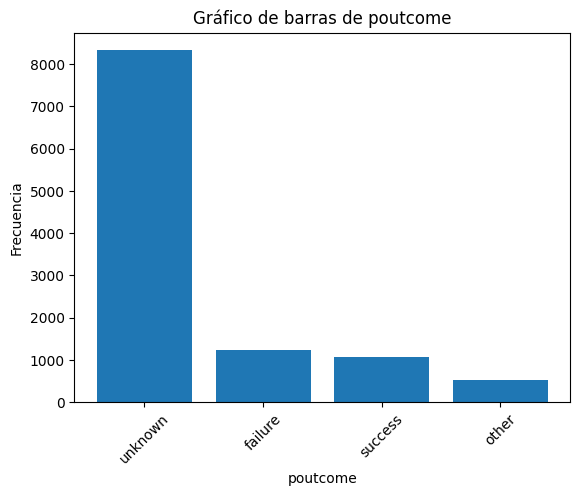

In [178]:
graficar(dat, 15)

**Interpretacion:**

La grafica muestra la distribución de los resultados de la campaña anterior entre los clientes. La categoría "Desconocido" es la más común, lo que sugiere que para una gran cantidad de clientes, no se dispone de información sobre el resultado de la campaña anterior. Las categorías "Falla" y "Éxito" indican si la campaña anterior fue exitosa o no, y la categoría "Otro" puede representar otros resultados que no se especifican en las categorías anteriores.

El conocimiento sobre los resultados de campañas anteriores es esencial para comprender la efectividad de las estrategias pasadas y puede influir en las decisiones sobre cómo abordar futuras campañas.

# deposit:    ¿El cliente suscribió un producto de depósito a plazo?

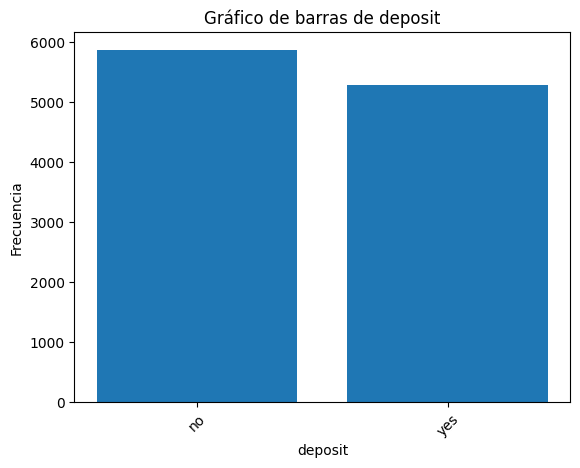

In [179]:
graficar(dat, 16)

**Interpretacion:**

Esta información muestra la distribución de la variable que indica si los clientes realizaron depósitos a plazo fijo. Casi la mitad de los clientes no realizaron un depósito a plazo fijo, mientras que el otro porcentaje de clientes sí lo hicieron.

El conocimiento sobre la decisión de realizar depósitos a plazo fijo es fundamental para comprender la respuesta de los clientes a las campañas de marketing y a las ofertas financieras.